In [35]:
import pandas as pd

import matplotlib.pyplot as plt
plt.close("all")

import numpy as np

In [2]:
rawdata = pd.read_csv('data/SBERPRICE.csv', delimiter=';', index_col=False)
del rawdata['num']
#rawdata = rawdata.iloc[:,0]
print(rawdata)

        open   close     low    high
0      97.80   95.38   95.38   97.80
1      95.53   93.74   93.50   95.67
2      93.76   93.71   93.29   94.50
3       0.00   91.70    0.00   91.73
4       0.00   92.33    0.00   92.33
...      ...     ...     ...     ...
1996  349.68  332.05  328.79  510.00
1997  332.05  327.15  325.22  333.37
1998  327.58  327.56  326.61  330.06
1999  330.18  323.13  323.13  331.15
2000  324.34  324.54  324.32  325.18

[2001 rows x 4 columns]


In [46]:
keywords = ['open', 'close', 'low', 'high']
for word in keywords:
    rawdata.drop(rawdata[(rawdata[word] >500) | (rawdata[word] < 50)].index, inplace=True)
df = rawdata
print(df)

        open   close     low    high
0      97.80   95.38   95.38   97.80
1      95.53   93.74   93.50   95.67
2      93.76   93.71   93.29   94.50
5      93.91   91.28   90.86   93.91
7      89.67   91.00   88.00   91.00
...      ...     ...     ...     ...
1995  335.56  339.05  333.31  339.05
1997  332.05  327.15  325.22  333.37
1998  327.58  327.56  326.61  330.06
1999  330.18  323.13  323.13  331.15
2000  324.34  324.54  324.32  325.18

[1990 rows x 4 columns]


In [31]:
up = []
down = []
upcnt = 0
downcnt = 0
for index, row in df.iterrows():
    op = row['open'] 
    cl = row['close']
    if op < cl:
        upcnt = upcnt + 1
        if downcnt: down.append(downcnt)
        downcnt = 0
    else:
        downcnt = downcnt + 1
        if upcnt: up.append(upcnt)
        upcnt = 0
print(up)

[1, 4, 1, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 4, 2, 3, 1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 2, 3, 1, 8, 3, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 7, 4, 1, 1, 2, 2, 1, 2, 3, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 4, 2, 1, 2, 3, 2, 2, 5, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 7, 1, 4, 2, 2, 1, 1, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 2, 5, 4, 1, 2, 5, 1, 1, 6, 1, 2, 2, 3, 3, 1, 1, 1, 2, 3, 1, 3, 2, 3, 1, 4, 3, 3, 3, 2, 1, 1, 9, 1, 1, 2, 2, 1, 1, 6, 1, 2, 1, 3, 2, 2, 1, 4, 1, 1, 1, 5, 1, 1, 2, 2, 5, 1, 1, 3, 1, 2, 2, 4, 3, 4, 6, 1, 2, 2, 2, 1, 1, 3, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3, 2, 3, 5, 1, 4, 1, 1, 6, 2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 2, 1, 1, 3, 2, 3, 1, 3, 1, 4, 2, 1, 3, 2, 2, 3, 2, 2, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 4, 3, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 2, 1, 3, 3, 4, 2, 2, 1, 1, 1, 1, 1, 

In [32]:
sumup = sum(up)
avr = sumup/len(up)
print(avr)
print(len(up))

1.864864864864865
518


In [40]:
hst = np.histogram(a=up, bins=max(up)-1)
print(hst)
print(hst[0][0]/len(up))

(array([276, 133,  63,  21,  11,   6,   5,   3], dtype=int64), array([1., 2., 3., 4., 5., 6., 7., 8., 9.]))
0.5328185328185329


(array([276., 133.,  63.,  21.,  11.,   6.,   5.,   3.]),
 array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 8 artists>)

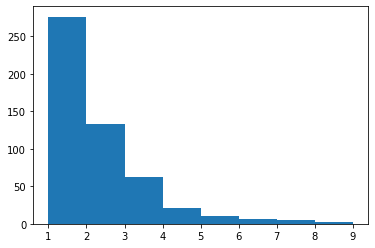

In [37]:
counts, bins = np.histogram(a=up, bins=max(up)-1)
plt.hist(bins[:-1], bins, weights=counts)

519


(array([266., 120.,  69.,  33.,  16.,  11.,   2.,   1.,   1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 9 artists>)

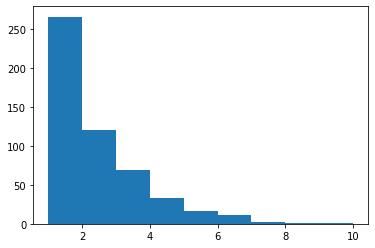

In [38]:
print(len(down))
counts, bins = np.histogram(a=down, bins=max(down)-1)
plt.hist(bins[:-1], bins, weights=counts)